# Climate data Gothenburg


This notebook shows how to download monthly files for a specified period from two meteorological stations in Gothenburg: **Roof station** at the Department of Earth Sciences and **Bridge station** at Alvborgsbron. 


More info about the weather stations can be found here: 

https://gvc.gu.se/english/research-facilities/weather-stations/climate-data



*Contact: julia.kukulies@gu.se*

## Location of GVC weather stations

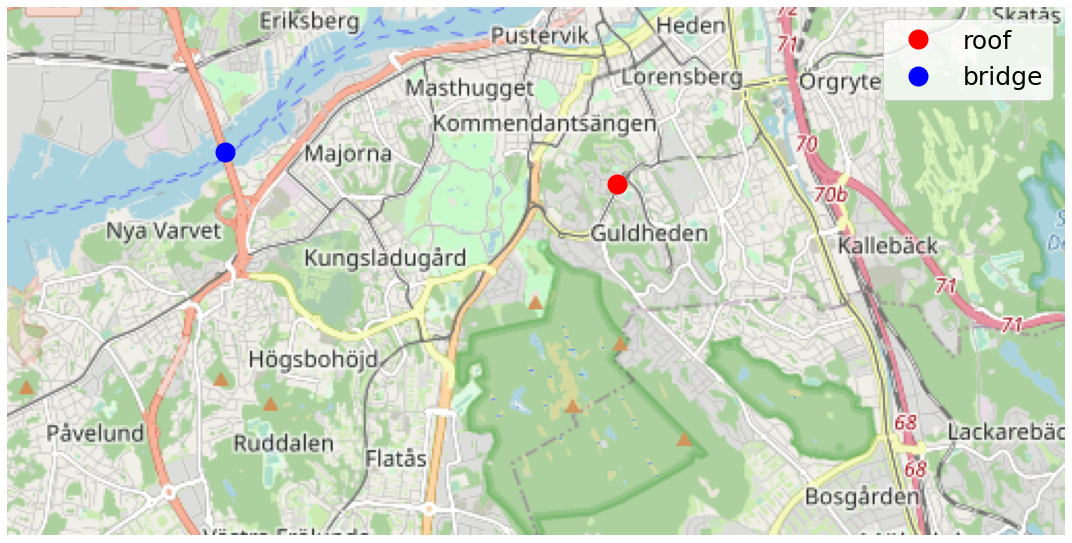

In [1]:
import matplotlib.pyplot as plt
import smopy # library to plot locations with OSM 

map = smopy.Map((57.683, 11.88, 57.695, 11.95), z= 12)
x, y = map.to_pixels(57.688374,11.966434)
x1, y1 = map.to_pixels(57.691201,11.901476)
ax = map.show_mpl(figsize=(15, 12))
ax.plot(x, y, 'or', ms=12, mew=8, label = 'roof')
ax.plot(x1, y1, 'ob', ms=12, mew=8, label = 'bridge')
plt.legend(fontsize= 25)
plt.show()

## Download data for specific time period and station 

In [13]:
# import libraries 
import wget
import urllib
import glob
import numpy as np 
import pandas as pd
import os
%matplotlib inline

In [46]:
def get_data(station, hourly = False , start = None, end= None , output= None):
    ''' This function downloads meteorological station data for a specified station and period.

    Input parameters:
    
    station (str) : specify station: roof/tak or bridge/bro
    hourly (boolean) : set True to get hourly instead of 10 min data 
    start (int) : start year , if None you get all available data 
    end (int) : end year , if None you get all available data 
    output (str) : specify output directory for data 

    '''
    if station =='roof' or station == 'tak':
        station  = 'http://pc70.gvc.gu.se/~urban-net/GVCdata/'
        if hourly is True:
            frequency = 'gvc_roof_60mindata_'
            if end is None: 
                end= 2016 + 1
        else:
            frequency = 'gvc_roof_10mindata_'
            if end is None:
                end = 2020 + 1
            
    if station == 'bro' or station == 'bridge':
        station = 'http://pc70.gvc.gu.se/~urban-net/Bridgedata/'
        if hourly is True:
            frequency = 'bro_60mindata_'
            if end is None:
                end = 2020 + 1
        else:
            frequency = 'bro_10mindata_'
            if end== None:
                end = 2013 + 1 
                
    if start is None:
        start = 1998
        
    months = np.arange(1,13).astype(str)
    years= np.arange(start,end).astype(str)

    for y in years:
        for m in months:
            # download data 
            url= station + frequency + y + '_'  +m +'.txt'
            try:
                filename= wget.download(url, out = output + frequency + y + '_'  +m +'.txt')
                print(filename, 'downloaded.' )
            except:
                print('no file called', url)
                continue

## Example to download 10 minute data from the last five years for roof:

In [5]:
# get info about the function again 
help(get_data)

Help on function get_data in module __main__:

get_data(station, hourly=False, start=None, end=None, output=None)
    This function downloads meteorological station data for a specified station and period.
    
    Input parameters:
    
    station (str) : specify station: roof or bridge/bro
    hourly (boolean) : set True to get hourly instead of 10 min data 
    start (int) : start year , if None you get all available data 
    end (int) : end year , if None you get all available data 
    output (str) : specify output directory for data



In [48]:
# call function, specify station and output (and if you want time period and resolution)
get_data('roof', start = 2015, end = 2020, output = 'data/')

data/gvc_roof_10mindata_2015_1 (1).txt downloaded.
data/gvc_roof_10mindata_2015_2.txt downloaded.
data/gvc_roof_10mindata_2015_3.txt downloaded.
data/gvc_roof_10mindata_2015_4.txt downloaded.
data/gvc_roof_10mindata_2015_5.txt downloaded.
data/gvc_roof_10mindata_2015_6.txt downloaded.
data/gvc_roof_10mindata_2015_7.txt downloaded.
data/gvc_roof_10mindata_2015_8.txt downloaded.
data/gvc_roof_10mindata_2015_9.txt downloaded.
data/gvc_roof_10mindata_2015_10.txt downloaded.
data/gvc_roof_10mindata_2015_11.txt downloaded.
data/gvc_roof_10mindata_2015_12.txt downloaded.
data/gvc_roof_10mindata_2016_1.txt downloaded.
data/gvc_roof_10mindata_2016_2.txt downloaded.
data/gvc_roof_10mindata_2016_3.txt downloaded.
data/gvc_roof_10mindata_2016_4.txt downloaded.
data/gvc_roof_10mindata_2016_5.txt downloaded.
data/gvc_roof_10mindata_2016_6.txt downloaded.
data/gvc_roof_10mindata_2016_7.txt downloaded.
no file called http://pc70.gvc.gu.se/~urban-net/GVCdata/gvc_roof_10mindata_2016_8.txt
data/gvc_roof_

In [6]:
# function to get all available data from both stations 
def get_all():
    """ This function downloads all available data from both GVC stations: 
    roof and bridge at 10 min and 60 min resolution.

    """
    d= os.mkdir('/roof_10min/')
    get_data('roof', output = d)
    d= os.mkdir('/roof_60min/')
    get_data('roof', hourly = True, output = d)
    d= os.mkdir('/bro_10min/')
    get_data('bro', output = d)
    d= os.mkdir('/bro_60min/')
    get_data('bro', hourly = True, output = d)


## Import data as pandas dataframe

**1. Import one monthly file**

In [98]:
files= glob.glob('data/gvc_roof_10mindata_2016*.txt')

# !for data before April 2013, use: 
#cols = 19

# ! for data between April 2013 and September 2014, use: 
#cols = 21

# ! for data after August 2014 (from September 2014), use: 
cols = 37

df = pd.read_csv(files[0], header=0, delimiter="\s+", encoding='utf-8', usecols=np.arange(cols))

for f in files: 
    data =pd.read_csv(f, header=0, delimiter="\s+", encoding='utf-8', usecols=np.arange(cols))
    df= df.append(data)


In [99]:
# show column names of dataframe 
df

,Code,Year,DOY,HHMM,Ta,RH,Ws,Wd,Wd_sd,RainPerPeriod,...,P,R_amount,R_time,R_intens,H_amount,H_time,H_intens,Ws_avg.1,Wd_avg.1,Wd_std
0,736635.0,2016,306,0,8.99,98.00,0.01,0.0,0.0,0.0,...,1007.0,0.0,2.00,0.29,0.0,0.0,0.0,4.05,239.0,16.60
1,736635.0,2016,306,10,8.99,98.10,0.01,0.0,0.0,0.0,...,1007.0,0.0,1.92,0.11,0.0,0.0,0.0,3.39,244.7,16.08
2,736635.0,2016,306,20,9.01,98.10,0.01,0.0,0.0,0.0,...,1006.0,0.0,1.08,0.02,0.0,0.0,0.0,4.85,238.6,12.12
3,736635.0,2016,306,30,9.03,98.20,0.01,0.0,0.0,0.0,...,1006.0,0.0,0.08,0.00,0.0,0.0,0.0,4.49,243.5,13.53
4,736635.0,2016,306,40,9.03,98.20,0.01,0.0,0.0,0.0,...,1006.0,0.0,0.00,0.00,0.0,0.0,0.0,4.91,238.0,12.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,736361.0,2016,31,2310,-80.80,35.05,0.01,0.0,0.0,0.0,...,0.0,NaN,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00
1345,736361.0,2016,31,2320,-80.60,35.74,0.01,0.0,0.0,0.0,...,0.0,NaN,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00
1346,736361.0,2016,31,2330,-81.60,35.60,0.01,0.0,0.0,0.0,...,0.0,NaN,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00
1347,736361.0,2016,31,2340,-81.70,36.13,0.01,0.0,0.0,0.0,...,0.0,NaN,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00


## Climate data

**1. Timeseries for 2015 - 2020**

In [71]:
import matplotlib.pyplot as plt

In [86]:
df.GlobalRadiaion_SPN1.values

array([3.915, 3.98 , 3.879, ..., 3.316, 3.24 , 3.22 ])

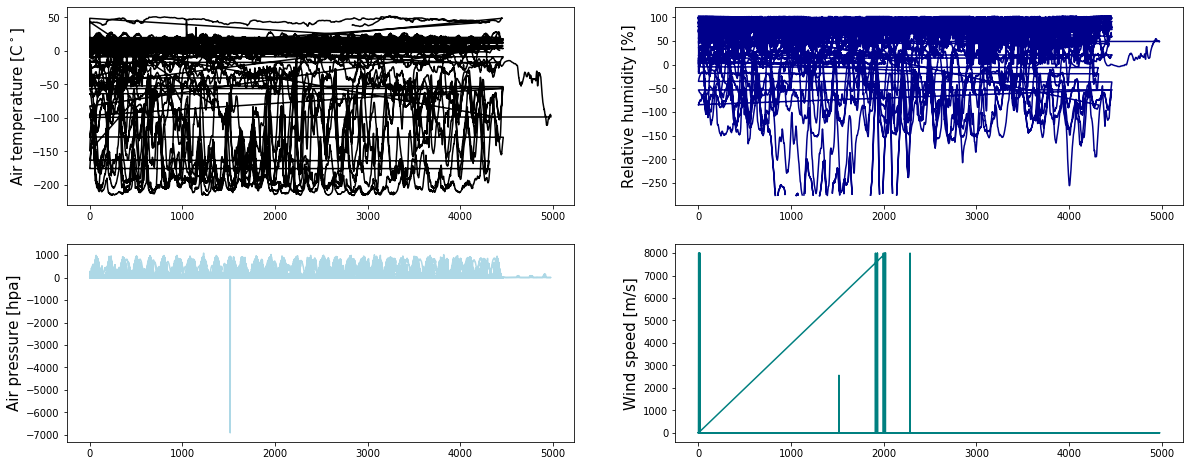

In [93]:
plt.figure(figsize=(20,8))
s= 15

plt.subplot(2,2,1)
ax1= df.Ta.plot(color='k')
ax1.set_ylabel('Air temperature [C$^\circ$]', fontsize = s)

plt.subplot(2,2,2)
ax2= df.RH.plot(color ='darkblue')
ax2.set_ylabel('Relative humidity [%]', fontsize = s)


plt.subplot(2,2,3)
ax3= df.GlobalRadiaion_SPN1.plot(color ='lightblue')
ax3.set_ylabel('Air pressure [hpa]', fontsize = s)


plt.subplot(2,2,4)
ax4= df.Ws.plot(color ='teal')
ax4.set_ylabel('Wind speed [m/s]', fontsize = s)

plt.show()

**2. Plot multiple variables in one plot (Example with two y-axes)** 

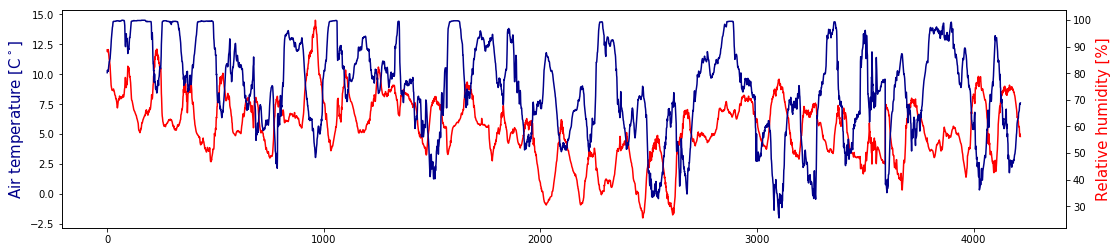

In [179]:
plt.figure(figsize= (18,4))

ax1 = df.Ta.plot(color ='r')
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
df.RH.plot(ax = ax2, color = 'darkblue')
ax1.set_ylabel('Air temperature [C$^\circ$]', fontsize= 15, color ='darkblue')
ax2.set_ylabel('Relative humidity [%]', fontsize= 15, color = 'red')

plt.show()


**3. Get column in datetime format **

Why? 

The python datetime format is very useful, because you can easily use it to calculate averages for hours, days, months or years, calculate time intervals and more..

In [212]:
# pad HHMM with zeros to identify hours and minutes 
for i,x in enumerate(df.HHMM.values):
    df.loc[i, 'hhmm'] = str(x).zfill(4)
    
timestr= df.Year.astype(str) + '/'+ df.DOY.astype(str) + '/'+ df.hhmm.values

# add a time column to dataframe which contains the date and time in datetime format 
df['time'] = pd.to_datetime(timestr, format ='%Y/%j/%H%M')

In [216]:
# look at first 5 rows of new column:
df.time.head()

0   2017-04-01 00:00:00
1   2017-04-01 00:10:00
2   2017-04-01 00:20:00
3   2017-04-01 00:30:00
4   2017-04-01 00:40:00
Name: time, dtype: datetime64[ns]

In [226]:
# get easy access to years/months/days/hours with:
years= df.time.dt.year
months = df.time.dt.month
days = df.time.dt.day
hours = df.time.dt.hour

**4. Calculate and plot diurnal cycle (Example temperature)**

In [242]:
# calculate average for every hour, e.g. with groupby - function 
hourly_temperature= df.Ta.groupby(df.time.dt.hour).mean()

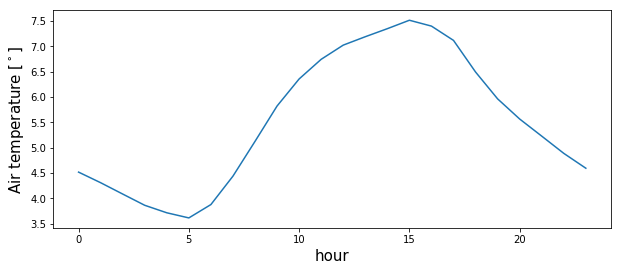

In [243]:
# plot diurnal cycle 
plt.figure(figsize= (10,4))
hourly_temperature.plot()
plt.xlabel('hour', fontsize= 15)
plt.ylabel('Air temperature [$^\circ$]', fontsize= 15)
plt.show()

**5. Calculate and plot seasonal cycle (Example temperature)**